In [2]:
!pip3 install SpeechRecognition pydub

In [3]:
import speech_recognition as sr

In [44]:
filename = "name.wav"


In [45]:
# initialize the recognizer
r = sr.Recognizer()

In [47]:
# Import the speech_recognition library and alias it as sr
import speech_recognition as sr

# Initialize the recognizer object
r = sr.Recognizer()

In [52]:
# open the file
with sr.AudioFile('name.wav') as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print(text)

hello kya meri baat man Raha Hai Aman good afternoon admission department se aapka BTech ke liye application form received karna this year aap Madhya Pradesh mein kahan se baat kar rahe hain Bhopal se karte hain to Bhopal


In [ ]:
import speech_recognition as sr


In [54]:

def mp3_to_text(mp3_file):
    # Initialize the recognizer
    r = sr.Recognizer()

    # Open the MP3 file
    with sr.AudioFile(mp3_file) as source:
        # Listen for the data (load audio to memory)
        audio_data = r.record(source)

        try:
            # Recognize speech using Google Web Speech API
            text = r.recognize_google(audio_data)
            return text
        except sr.UnknownValueError:
            print("Google Web Speech API could not understand the audio.")
        except sr.RequestError as e:
            print(f"Could not request results from Google Web Speech API; {e}")

# Example usage:
mp3_file = "name.wav"
result_text = mp3_to_text(mp3_file)
print("Converted Text:")
print(result_text)


Converted Text:
hello kya meri baat man Raha Hai Aman good afternoon admission department se aapka BTech ke liye application form received karna this year aap Madhya Pradesh mein kahan se baat kar rahe hain Bhopal se karte hain to Bhopal


In [56]:
import speech_recognition as sr

def large_mp3_to_text(mp3_file, chunk_duration=10):
    # Initialize the recognizer
    r = sr.Recognizer()

    # Open the MP3 file
    with sr.AudioFile(mp3_file) as source:
        # Get the total duration of the audio file in seconds
        audio_duration = source.DURATION

        # Initialize variables for tracking progress
        offset = 0
        full_text = ""

        # Process the audio file in smaller chunks
        while offset < audio_duration:
            with source.offset(offset=offset, duration=chunk_duration) as chunk:
                # Listen for the data (load audio chunk to memory)
                audio_data = r.record(chunk)

                try:
                    # Recognize speech using Google Web Speech API
                    text = r.recognize_google(audio_data)
                    full_text += text + " "
                except sr.UnknownValueError:
                    print("Google Web Speech API could not understand the audio.")
                except sr.RequestError as e:
                    print(f"Could not request results from Google Web Speech API; {e}")

            # Move to the next chunk
            offset += chunk_duration

    return full_text

# Example usage:
mp3_file = "name.wav"
result_text = large_mp3_to_text(mp3_file)
print("Converted Text:")
print(result_text)


AttributeError: 'AudioFile' object has no attribute 'offset'

In [58]:
import speech_recognition as sr

def large_mp3_to_text(mp3_file, chunk_duration=10):
    # Initialize the recognizer
    r = sr.Recognizer()

    # Open the MP3 file
    with sr.AudioFile(mp3_file) as source:
        # Get the total duration of the audio file in seconds
        audio_duration = source.DURATION

        # Initialize variables for tracking progress
        offset = 0
        full_text = ""

        # Process the audio file in smaller chunks
        while offset < audio_duration:
            # Calculate the remaining duration or use chunk_duration, whichever is smaller
            duration = min(chunk_duration, audio_duration - offset)

            with source.record(offset=offset, duration=duration) as chunk:
                # Listen for the data (load audio chunk to memory)
                audio_data = r.record(chunk)

                try:
                    # Recognize speech using Google Web Speech API
                    text = r.recognize_google(audio_data)
                    full_text += text + " "
                except sr.UnknownValueError:
                    print("Google Web Speech API could not understand the audio.")
                except sr.RequestError as e:
                    print(f"Could not request results from Google Web Speech API; {e}")

            # Move to the next chunk
            offset += chunk_duration

    return full_text

# Example usage:
mp3_file = "name.wav"
result_text = large_mp3_to_text(mp3_file)
print("Converted Text:")
print(result_text)


AttributeError: 'AudioFile' object has no attribute 'record'

In [63]:
import speech_recognition as sr

def large_mp3_to_text(mp3_file, chunk_duration=10):
    # Initialize the recognizer
    r = sr.Recognizer()

    # Open the MP3 file
    with sr.AudioFile(mp3_file) as source:
        # Get the total duration of the audio file in seconds
        audio_duration = source.DURATION

        # Initialize variables for tracking progress
        offset = 0
        full_text = ""

        # Process the audio file in smaller chunks
        while offset < audio_duration:
            # Calculate the remaining duration or use chunk_duration, whichever is smaller
            duration = min(chunk_duration, audio_duration - offset)

            audio_data = None
            try:
                # Listen for the data (load audio chunk to memory)
                audio_data = next(source.iter(offset=offset, duration=duration))
            except sr.WaitTimeoutError:
                print("Audio processing timeout.")
                break

            if audio_data:
                try:
                    # Recognize speech using Google Web Speech API
                    text = r.recognize_google(audio_data)
                    full_text += text + " "
                except sr.UnknownValueError:
                    print("Google Web Speech API could not understand the audio.")
                except sr.RequestError as e:
                    print(f"Could not request results from Google Web Speech API; {e}")

            # Move to the next chunk
            offset += chunk_duration

    return full_text

# Example usage:
mp3_file = "name.wav"
result_text = large_mp3_to_text(mp3_file)
print("Converted Text:")
print(result_text)


AttributeError: 'AudioFile' object has no attribute 'iter'

In [64]:
# importing libraries 
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence

# create a speech recognition object
r = sr.Recognizer()

# a function to recognize speech in the audio file
# so that we don't repeat ourselves in in other functions
def transcribe_audio(path):
    # use the audio file as the audio source
    with sr.AudioFile(path) as source:
        audio_listened = r.record(source)
        # try converting it to text
        text = r.recognize_google(audio_listened)
    return text

# a function that splits the audio file into chunks on silence
# and applies speech recognition
def get_large_audio_transcription_on_silence(path):
    """Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks"""
    # open the audio file using pydub
    sound = AudioSegment.from_file(path)  
    # split audio sound where silence is 500 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        try:
            text = transcribe_audio(chunk_filename)
        except sr.UnknownValueError as e:
            print("Error:", str(e))
        else:
            text = f"{text.capitalize()}. "
            print(chunk_filename, ":", text)
            whole_text += text
    # return the text for all chunks detected
    return whole_text

C:\Users\hp\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [66]:
# importing libraries
import speech_recognition as sr
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

# create a speech recognition object
r = sr.Recognizer()

# a function to recognize speech in the audio file
# so that we don't repeat ourselves in other functions
def transcribe_audio(path):
    # use the audio file as the audio source
    with sr.AudioFile(path) as source:
        audio_listened = r.record(source)
        # try converting it to text
        text = r.recognize_google(audio_listened)
    return text

# a function that splits the audio file into chunks on silence
# and applies speech recognition
def get_large_audio_transcription_on_silence(path):
    """Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks"""
    # open the audio file using pydub
    sound = AudioSegment.from_file(path)
    # split audio sound where silence is 500 milliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len=500,
        # adjust this per requirement
        silence_thresh=sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        try:
            text = transcribe_audio(chunk_filename)
        except sr.UnknownValueError as e:
            print("Error:", str(e))
        else:
            text = f"{text.capitalize()}. "
            print(chunk_filename, ":", text)
            whole_text += text
    # return the text for all chunks detected
    return whole_text

# Example usage:
wav_file = "name.wav"
result_text = get_large_audio_transcription_on_silence(wav_file)
print("Converted Text:")
print(result_text)


audio-chunks\chunk1.wav : Hello. 
audio-chunks\chunk2.wav : Kya meri baat aman rana se ho rahi hai. 
audio-chunks\chunk3.wav : Aman good afternoon mein sanshodhan academy counselor payal baat karne mein admission department se. 
audio-chunks\chunk4.wav : Aapka bete ke liye application form receiver hai aapko btech karna this year. 
audio-chunks\chunk5.wav : Yes. 
audio-chunks\chunk6.wav : Aap madhya pradesh mein kahan se baat kar rahe hain. 
audio-chunks\chunk7.wav : Nabi recently bhopal. 
audio-chunks\chunk8.wav : Bhopal mein bhopal se karte hain betul se karte hain. 
audio-chunks\chunk9.wav : Kya. 
audio-chunks\chunk10.wav : Bhopal. 
audio-chunks\chunk11.wav : Bhopal se belong karte ho aap. 
Error: 
audio-chunks\chunk13.wav : Bhopal aapko btech cse mein karna hai na. 
Error: 
audio-chunks\chunk15.wav : Agar aapko bhopal indore mein college milta hai to bhopal aapke liye comfortable hai. 
audio-chunks\chunk16.wav : Yes. 
audio-chunks\chunk17.wav : Theek hai to aapane 12th class mein k

In [67]:
# importing libraries
import speech_recognition as sr
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

# create a speech recognition object
r = sr.Recognizer()

# a function to recognize speech in the audio file
# so that we don't repeat ourselves in other functions
def transcribe_audio(path):
    # use the audio file as the audio source
    with sr.AudioFile(path) as source:
        audio_listened = r.record(source)
        # try converting it to text
        text = r.recognize_google(audio_listened)
    return text

# a function that splits the audio file into chunks on silence
# and applies speech recognition
def get_large_audio_transcription_on_silence(path):
    """Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks"""
    # open the audio file using pydub
    sound = AudioSegment.from_file(path)
    # split audio sound where silence is 500 milliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len=500,
        # adjust this per requirement
        silence_thresh=sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        try:
            text = transcribe_audio(chunk_filename)
        except sr.UnknownValueError as e:
            print("Error:", str(e))
        else:
            text = f"{text.capitalize()}. "
            print(chunk_filename, ":", text)
            whole_text += text
    # return the text for all chunks detected
    return whole_text

# Example usage:
wav_file = "aryan.wav"
result_text = get_large_audio_transcription_on_silence(wav_file)
print("Converted Text:")
print(result_text)


Error: 
audio-chunks\chunk2.wav : Hello. 
Error: 
audio-chunks\chunk4.wav : Aryan se baat ho rahi hai. 
audio-chunks\chunk5.wav : Han han. 
audio-chunks\chunk6.wav : Aryan good afternoon mastani song baat karo admission team se. 
audio-chunks\chunk7.wav : Kaise. 
audio-chunks\chunk8.wav : Afghanistan. 
Error: 
audio-chunks\chunk10.wav : Colleges ka aryan kya abhi planning kar rahe ho. 
audio-chunks\chunk11.wav : Actually maine yah kya matlab university mein admission liya abhi. 
audio-chunks\chunk12.wav : Kab admission liya. 
Error: 
audio-chunks\chunk14.wav : Aaj kitne baje. 
audio-chunks\chunk15.wav : 2 o'clock. 
audio-chunks\chunk16.wav : Mala application. 
audio-chunks\chunk17.wav : To k r mangal nahin lena hai koi aur bhi college ka option kaise ho sab dekhkar. 
audio-chunks\chunk18.wav : To college kahan idhar gurgaon side rahega to chalega kya. 
audio-chunks\chunk19.wav : Kahan chalega. 
audio-chunks\chunk20.wav : Kuch idea hai. 
audio-chunks\chunk21.wav : Han like ki admission 

Error: 
Error: 
audio-chunks\chunk170.wav : To aapka first start urination weeks hota hai. 
audio-chunks\chunk171.wav : Jisne aapko discovery india journey milti hai theek hai. 
Error: 
audio-chunks\chunk173.wav : School ka group hota hai vah. 
audio-chunks\chunk174.wav : Train ki trip hoti hai jismein india ke mostly states cover hote hain. 
Error: 
audio-chunks\chunk176.wav : Aur kuchh aur bhi bacche. 
audio-chunks\chunk177.wav : Unke sath. 
audio-chunks\chunk178.wav : All india. 
Error: 
audio-chunks\chunk180.wav : Isase kya hota hai. 
audio-chunks\chunk181.wav : Samajhte ho. 
audio-chunks\chunk182.wav : Theek hai. 
Error: 
audio-chunks\chunk184.wav : Baki pure sal to aapko coding karni hai coding fix syllabus mein kya kya rahata hai. 
audio-chunks\chunk185.wav : Aapko jaise first year ka jo college ka syllabus hota rahata hai. 
audio-chunks\chunk186.wav : Training karwata usmein aapko. 
audio-chunks\chunk187.wav : Portfolio building kya baat karenge portfolio kaise dikhane ke liye 

In [69]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_waveform_and_spectrogram(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot the spectrogram
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Example usage:
wav_file = "aryan.wav"
plot_waveform_and_spectrogram(wav_file)


ModuleNotFoundError: No module named 'librosa'

In [71]:
!pip install librosa


     -------------------------------------- 253.0/253.0 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 377.0/377.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.0/1.0 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 184.0/184.0 kB 2.8 MB/s eta 0:00:00
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23736 sha256=af3b8a04ed924d63ece3542ed3f622dce304c6bce831113a231e7b53db0a7099
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\3d\e0\4b\51b8aa4a0e2b6361c14943f7a7c2c7adb7b9cd419e0a1b720d
Successfully built audioread


In [72]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\lib\site-packages\lazy_loader\__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
C:\Users\hp\anaconda3\lib\site-packages\lazy_loader\__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


In [74]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


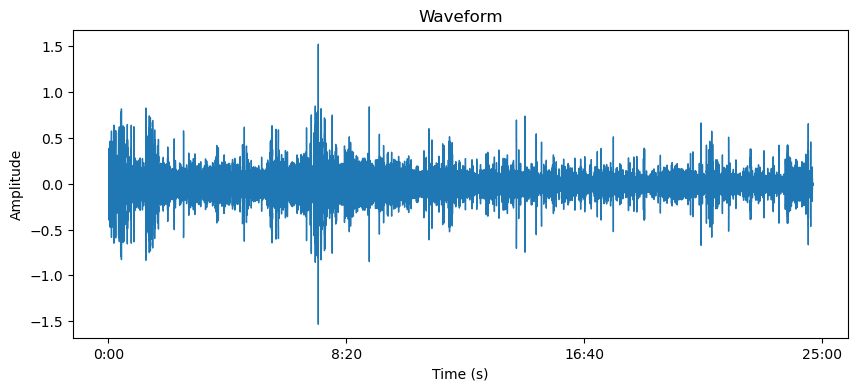

AttributeError: module 'matplotlib' has no attribute 'pyplot'

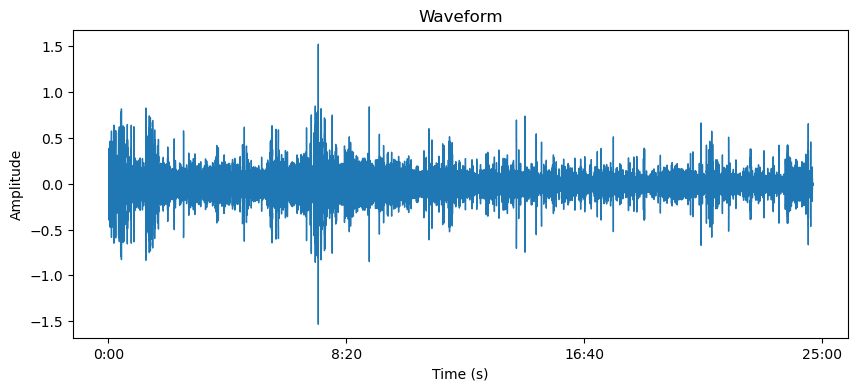

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [75]:
def plot_waveform_and_spectrogram(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot the spectrogram
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Example usage:
wav_file = "aryan.wav"
plot_waveform_and_spectrogram(wav_file)


In [76]:
pip install --upgrade matplotlib



     ---------------------------------------- 7.5/7.5 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\hp\\anaconda3\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [78]:
import matplotlib
print(matplotlib.__version__)


3.7.0


In [79]:
import matplotlib.pyplot as plt


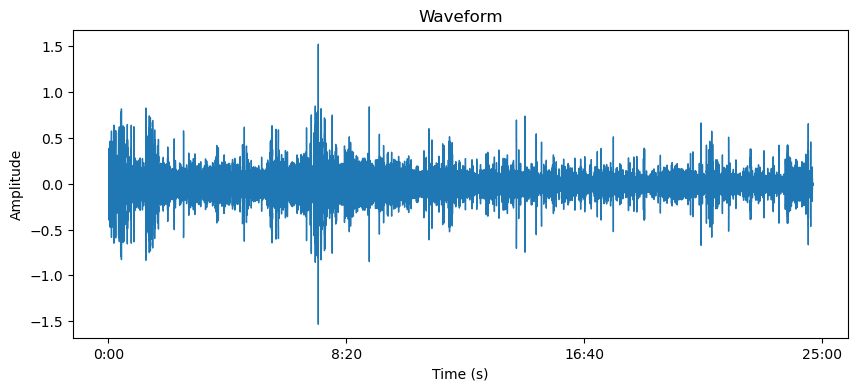

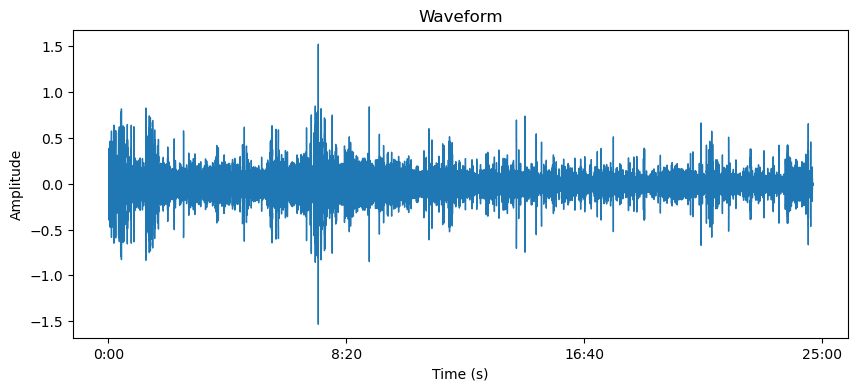

AttributeError: module 'matplotlib' has no attribute 'pyplot'

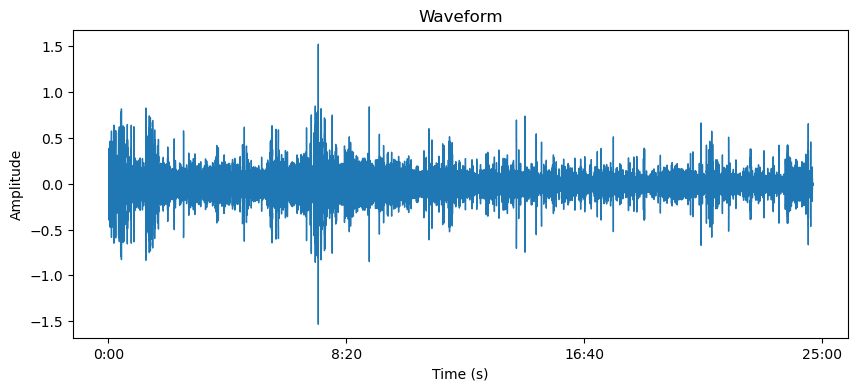

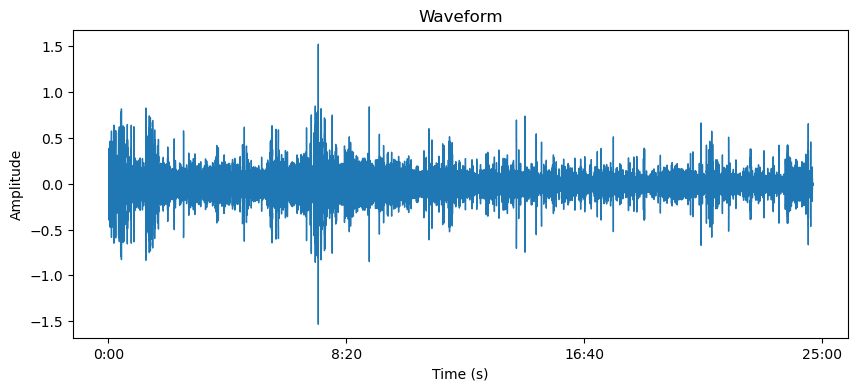

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [80]:
def plot_waveform_and_spectrogram(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot the spectrogram
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Example usage:
wav_file = "aryan.wav"
plot_waveform_and_spectrogram(wav_file)


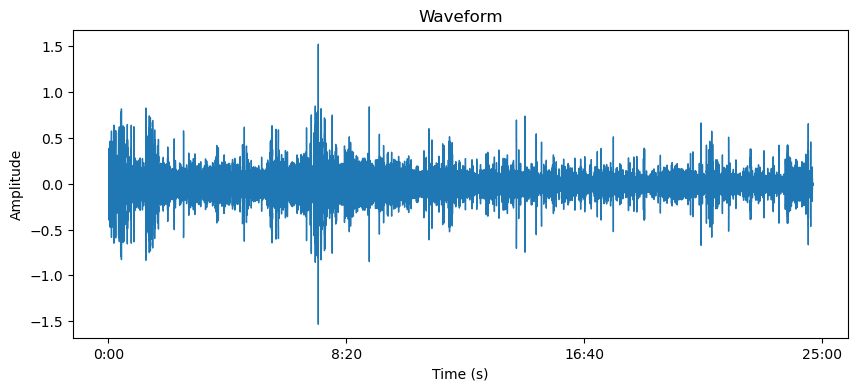

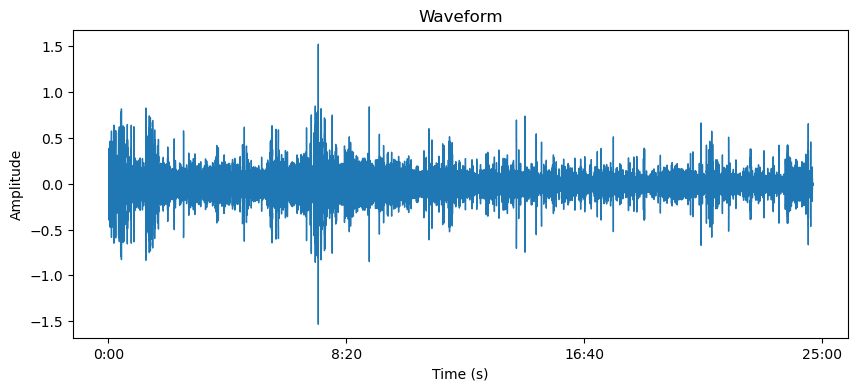

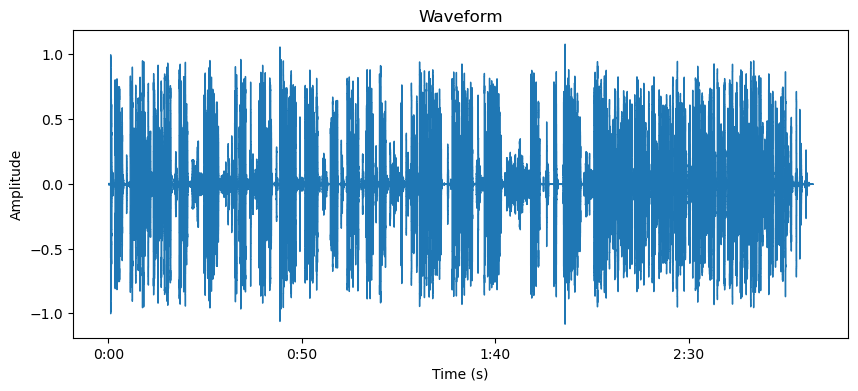

AttributeError: module 'matplotlib' has no attribute 'pyplot'

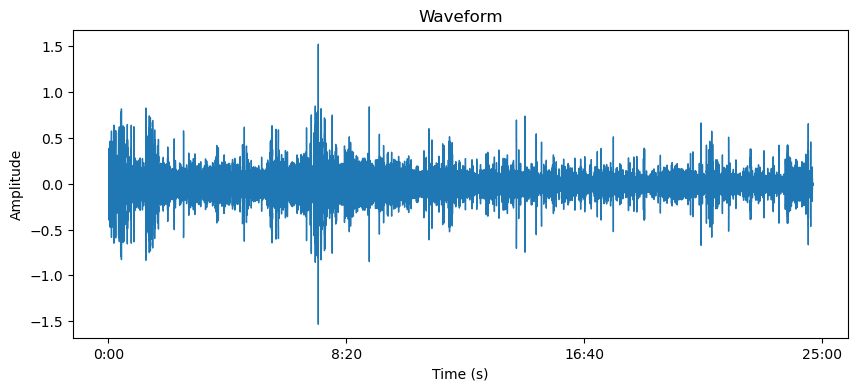

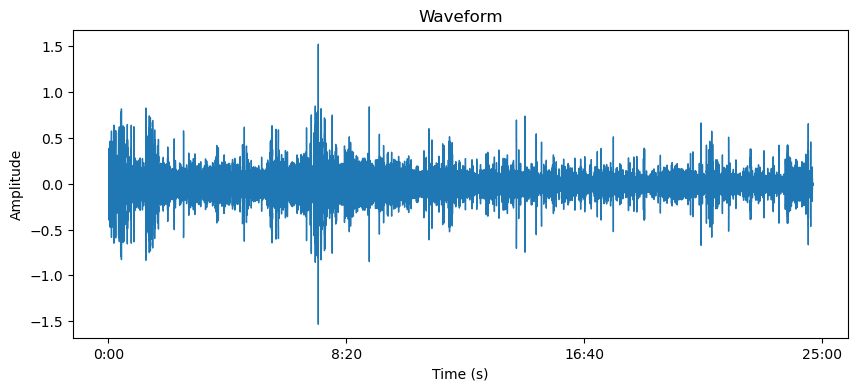

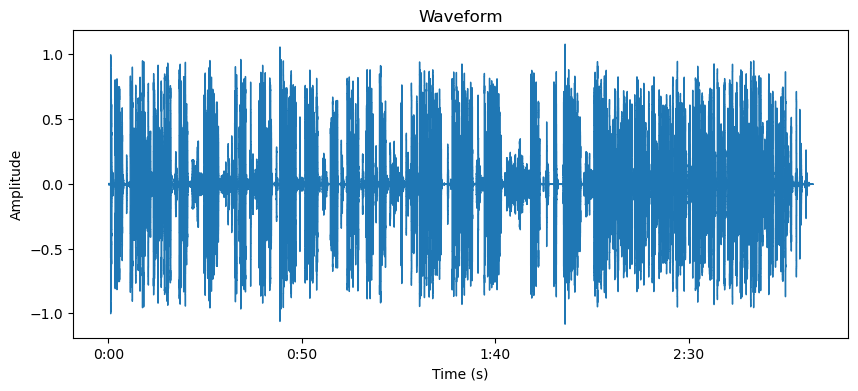

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [81]:
def plot_waveform_and_spectrogram(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot the spectrogram
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Example usage:
wav_file = "name.wav"
plot_waveform_and_spectrogram(wav_file)

In [82]:
from scipy.spatial.distance import mse
import soundfile as sf

def compare_audio_waveform_similarity(audio_file1, audio_file2):
    # Load audio data using soundfile library
    data1, sr1 = sf.read(audio_file1)
    data2, sr2 = sf.read(audio_file2)

    # Make sure both audio files have the same sample rate
    if sr1 != sr2:
        raise ValueError("Audio files must have the same sample rate.")

    # Make sure both audio files have the same length
    if len(data1) != len(data2):
        raise ValueError("Audio files must have the same length.")

    # Calculate the Mean Squared Error (MSE) between the two waveforms
    mse_score = mse(data1, data2)
    return mse_score

# Example usage:
audio_file1 = "name.wav"
audio_file2 = "aryan.wav"

try:
    mse_score = compare_audio_waveform_similarity(audio_file1, audio_file2)
    print(f"MSE Score: {mse_score}")
except ValueError as e:
    print("Error:", str(e))


ImportError: cannot import name 'mse' from 'scipy.spatial.distance' (C:\Users\hp\anaconda3\lib\site-packages\scipy\spatial\distance.py)

In [86]:
import soundfile as sf
from sklearn.metrics import mean_squared_error

def compare_audio_waveform_similarity(audio_file1, audio_file2):
    # Load audio data using soundfile library
    data1, sr1 = sf.read(audio_file1)
    data2, sr2 = sf.read(audio_file2)

    # Make sure both audio files have the same sample rate
    if sr1 != sr2:
        raise ValueError("Audio files must have the same sample rate.")

    # Make sure both audio files have the same length
    if len(data1) != len(data2):
        raise ValueError("Audio files must have the same length.")

    # Calculate the Mean Squared Error (MSE) between the two waveforms
    mse_score = mean_squared_error(data1, data2)
    return mse_score

# Example usage:
audio_file1 = "name.wav"
audio_file2 = "aryan1.wav"
try:
    mse_score = compare_audio_waveform_similarity(audio_file1, audio_file2)
    print(f"MSE Score: {mse_score}")
except ValueError as e:
    print("Error:", str(e))


Error: Audio files must have the same length.


In [5]:
# importing libraries
import speech_recognition as sr
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

# create a speech recognition object
r = sr.Recognizer()

# a function to recognize speech in the audio file
# so that we don't repeat ourselves in other functions
def transcribe_audio(path):
    # use the audio file as the audio source
    with sr.AudioFile(path) as source:
        audio_listened = r.record(source)
        # try converting it to text
        text = r.recognize_google(audio_listened)
    return text

# a function that splits the audio file into chunks on silence
# and applies speech recognition
def get_large_audio_transcription_on_silence(path):
    """Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks"""
    # open the audio file using pydub
    sound = AudioSegment.from_file(path)
    # split audio sound where silence is 500 milliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len=500,
        # adjust this per requirement
        silence_thresh=sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        try:
            text = transcribe_audio(chunk_filename)
        except sr.UnknownValueError as e:
            print("Error:", str(e))
        else:
            text = f"{text.capitalize()}. "
            print(chunk_filename, ":", text)
            whole_text += text
    # return the text for all chunks detected
    return whole_text

# Example usage:
wav_file = "(Audio) 3.wav"
result_text = get_large_audio_transcription_on_silence(wav_file)
print("Converted Text:")
print(result_text)


audio-chunks\chunk1.wav : Walking to this cause on chachi bhati from engineering for developer. 
audio-chunks\chunk2.wav : Is a perfect. 
audio-chunks\chunk3.wav : Teach this along with me. 
audio-chunks\chunk4.wav : She is a member of the technical staff of open the popular charge of the work has been teaching people how to use last language model technology in project. 
audio-chunks\chunk5.wav : Something something. 
audio-chunks\chunk6.wav : Everyone everyone has to know. 
audio-chunks\chunk7.wav : Along that has been focus on the cpt web user interface which many people using to do specific enough in one of us. 
audio-chunks\chunk8.wav : Last language. 
audio-chunks\chunk9.wav : That is using api calls to quickly bill software applications i think that is so very underweight. 
audio-chunks\chunk10.wav : Application applications and is an exciting to see what i am api without his very quickly. 
audio-chunks\chunk11.wav : So in this course. 
audio-chunks\chunk12.wav : Some the possib

In [7]:
import speech_recognition as sr

def convert_large_audio_to_text(audio_file_path, chunk_size=1024):
    recognizer = sr.Recognizer()

    with sr.AudioFile(audio_file_path) as source:
        # Adjust for ambient noise, if necessary
        recognizer.adjust_for_ambient_noise(source)

        # Create an audio generator to process the audio in chunks
        audio_generator = recognizer.record(source, duration=chunk_size)

        # Initialize an empty result to store the transcription
        text_result = ""

        # Process audio in chunks and recognize speech
        try:
            while True:
                audio_data = next(audio_generator)
                text_chunk = recognizer.recognize_google(audio_data, language="en-US")
                text_result += text_chunk + " "
        except StopIteration:
            pass
        except sr.UnknownValueError:
            print("Google Web Speech API could not understand the audio")
        except sr.RequestError as e:
            print(f"Could not request results from Google Web Speech API; {e}")

    return text_result

if __name__ == "__main__":
    audio_file_path = "(Audio) 3.wav"
    text_result = convert_large_audio_to_text(audio_file_path)
    if text_result:
        print("Transcription:")
        print(text_result)


TypeError: 'AudioData' object is not an iterator

In [10]:
import speech_recognition as sr

def convert_large_audio_to_text(audio_file_path, chunk_size=1024):
    recognizer = sr.Recognizer()

    with sr.AudioFile(audio_file_path) as source:
        # Adjust for ambient noise, if necessary
        recognizer.adjust_for_ambient_noise(source)

        # Create an audio generator to process the audio in chunks
        audio_generator = recognizer.record(source, offset=0, duration=chunk_size)

        # Initialize an empty result to store the transcription
        text_result = ""

        # Process audio in chunks and recognize speech
        try:
            while len(audio_generator.frame_data) > 0:
                text_chunk = recognizer.recognize_google(audio_generator, language="en-US")
                text_result += text_chunk + " "
                audio_generator = recognizer.record(source, offset=source.tell(), duration=chunk_size)
        except sr.UnknownValueError:
            print("Google Web Speech API could not understand the audio")
        except sr.RequestError as e:
            print(f"Could not request results from Google Web Speech API; {e}")

    return text_result

if __name__ == "__main__":
    audio_file_path = "(Audio) 3.wav"
    text_result = convert_large_audio_to_text(audio_file_path)
    if text_result:
        print("Transcription:")
        print(text_result)


Could not request results from Google Web Speech API; recognition request failed: Bad Request


In [9]:
try:
    # API request code here
except sr.RequestError as e:
    print(f"Error: {e}")

    

IndentationError: expected an indented block after 'try' statement on line 1 (1364823775.py, line 3)